## Libraries & loading the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("mental_health_diagnosis_treatment_.csv")
df

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,Mood Stabilizers,Dialectical Behavioral Therapy,2024-04-09,8,9,Improved,10,Depressed,73
496,497,22,Male,Panic Disorder,5,6,6,7,Benzodiazepines,Mindfulness-Based Therapy,2024-02-05,13,6,Deteriorated,8,Happy,86
497,498,23,Male,Major Depressive Disorder,7,3,4,2,Antidepressants,Cognitive Behavioral Therapy,2024-03-24,10,5,Deteriorated,5,Neutral,87
498,499,48,Male,Bipolar Disorder,9,4,6,9,Antidepressants,Mindfulness-Based Therapy,2024-03-22,10,6,Improved,7,Anxious,73


##  EDA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Patient ID                    500 non-null    int64 
 1   Age                           500 non-null    int64 
 2   Gender                        500 non-null    object
 3   Diagnosis                     500 non-null    object
 4   Symptom Severity (1-10)       500 non-null    int64 
 5   Mood Score (1-10)             500 non-null    int64 
 6   Sleep Quality (1-10)          500 non-null    int64 
 7   Physical Activity (hrs/week)  500 non-null    int64 
 8   Medication                    500 non-null    object
 9   Therapy Type                  500 non-null    object
 10  Treatment Start Date          500 non-null    object
 11  Treatment Duration (weeks)    500 non-null    int64 
 12  Stress Level (1-10)           500 non-null    int64 
 13  Outcome             

In [5]:
df.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

Patient ID                      500
Age                              43
Gender                            2
Diagnosis                         4
Symptom Severity (1-10)           6
Mood Score (1-10)                 6
Sleep Quality (1-10)              6
Physical Activity (hrs/week)     10
Medication                        6
Therapy Type                      4
Treatment Start Date            101
Treatment Duration (weeks)        9
Stress Level (1-10)               6
Outcome                           3
Treatment Progress (1-10)         6
AI-Detected Emotional State       6
Adherence to Treatment (%)       31
dtype: int64

In [8]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Patient ID,500.0,250.500,144.481833,1.0,125.75,250.5,375.25,500.0
Age,500.0,38.708,12.712433,18.0,28.00,38.0,50.00,60.0
Symptom Severity (1-10),500.0,7.478,1.706265,5.0,6.00,8.0,9.00,10.0
Mood Score (1-10),500.0,5.482,1.707486,3.0,4.00,5.0,7.00,8.0
Sleep Quality (1-10),500.0,6.472,1.668167,4.0,5.00,6.0,8.00,9.0
Physical Activity (hrs/week),500.0,5.216,2.829374,1.0,3.00,5.0,8.00,10.0
Treatment Duration (weeks),500.0,12.110,2.440864,8.0,10.00,12.0,14.00,16.0
Stress Level (1-10),500.0,7.542,1.709409,5.0,6.00,8.0,9.00,10.0
Treatment Progress (1-10),500.0,7.436,1.725067,5.0,6.00,7.0,9.00,10.0
Adherence to Treatment (%),500.0,75.454,9.086970,60.0,67.00,76.0,84.00,90.0


1-Treatment duration is 10-14 weeks with average 12 weeks

2-Despite an average symptom severity of 7.5, the treatment progress is also high 7.4 , so the treatment is effective

3-The average 75% adherence suggests some patients struggle to follow the treatment plan

In [10]:
category_col=df[df.select_dtypes(include='object').columns].drop(columns="Treatment Start Date")
category_col

,Gender,Diagnosis,Medication,Therapy Type,Outcome,AI-Detected Emotional State
0,Female,Major Depressive Disorder,Mood Stabilizers,Interpersonal Therapy,Deteriorated,Anxious
1,Female,Major Depressive Disorder,Antipsychotics,Interpersonal Therapy,No Change,Neutral
2,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Deteriorated,Happy
3,Female,Major Depressive Disorder,SSRIs,Mindfulness-Based Therapy,Deteriorated,Excited
4,Male,Panic Disorder,Anxiolytics,Interpersonal Therapy,Deteriorated,Excited
...,...,...,...,...,...,...
495,Male,Generalized Anxiety,Mood Stabilizers,Dialectical Behavioral Therapy,Improved,Depressed
496,Male,Panic Disorder,Benzodiazepines,Mindfulness-Based Therapy,Deteriorated,Happy
497,Male,Major Depressive Disorder,Antidepressants,Cognitive Behavioral Therapy,Deteriorated,Neutral
498,Male,Bipolar Disorder,Antidepressants,Mindfulness-Based Therapy,Improved,Anxious


C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette="Set2", ax=axes[0])
C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


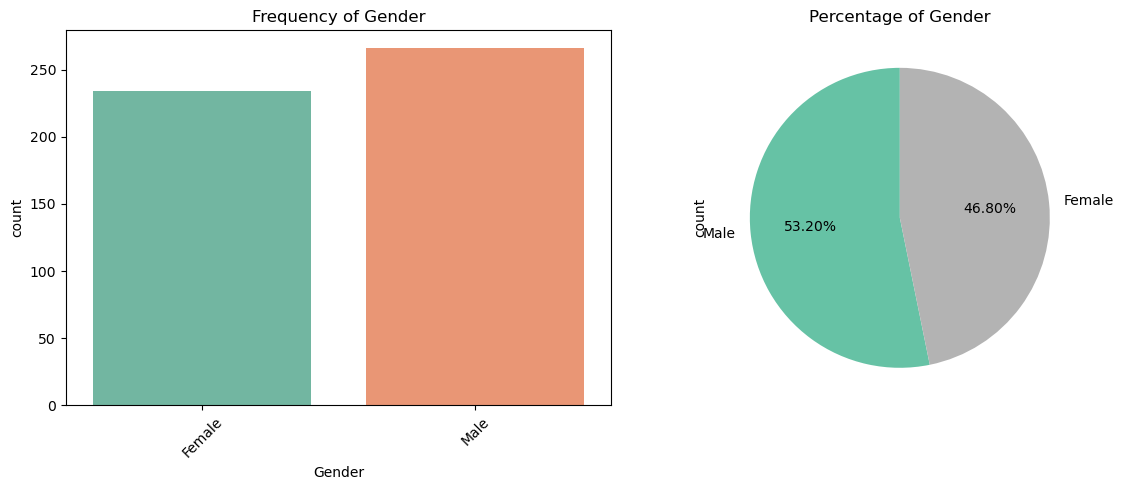

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette="Set2", ax=axes[0])
C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


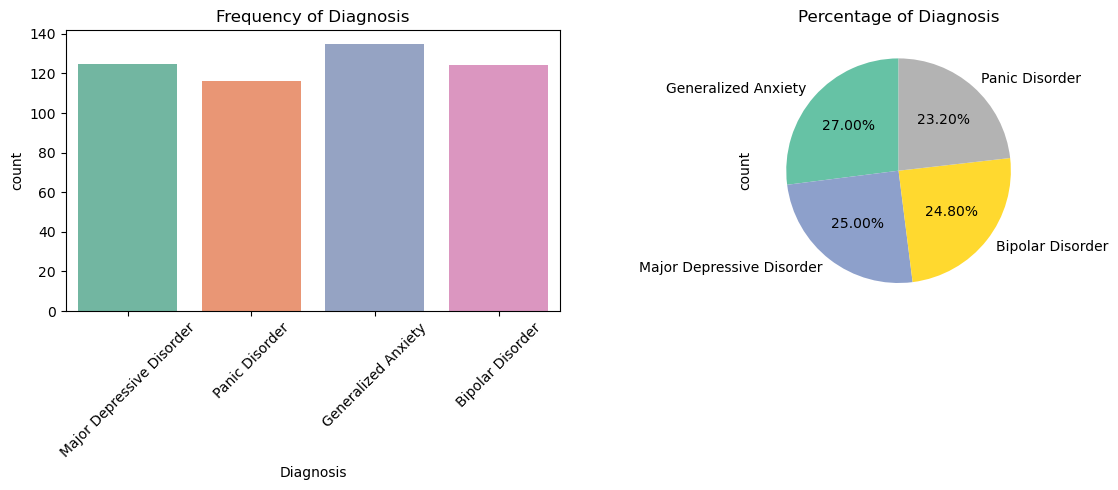

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette="Set2", ax=axes[0])
C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


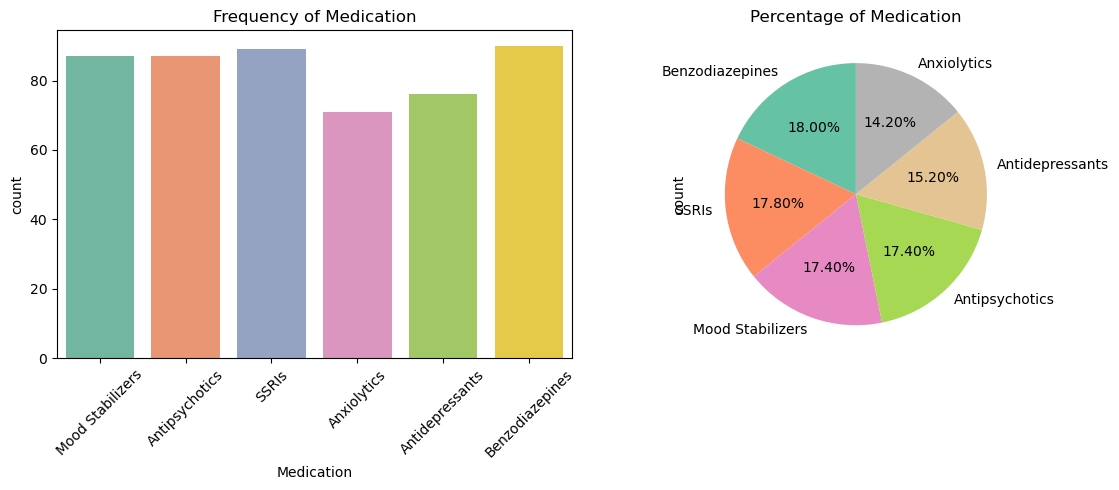

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette="Set2", ax=axes[0])
C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


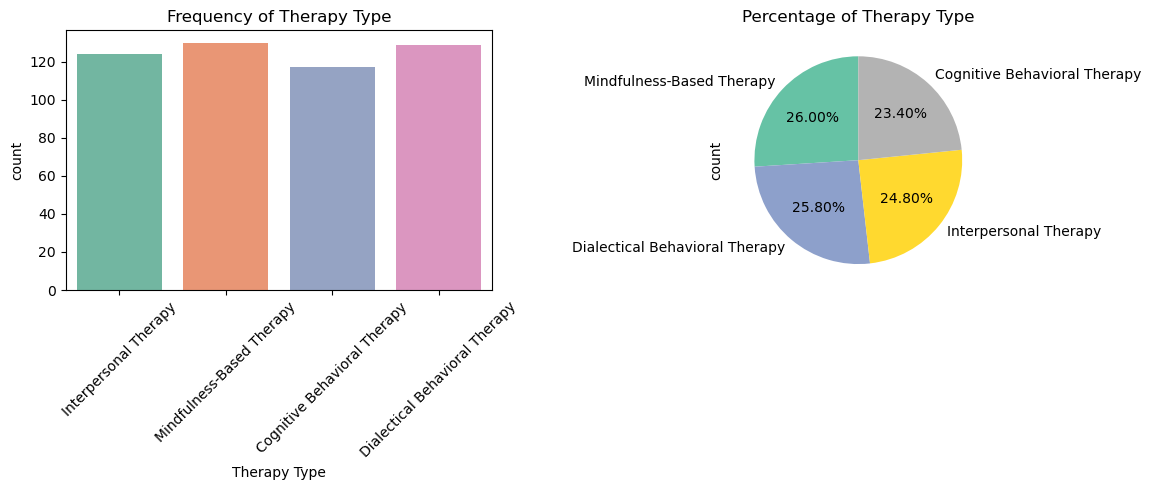

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette="Set2", ax=axes[0])
C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


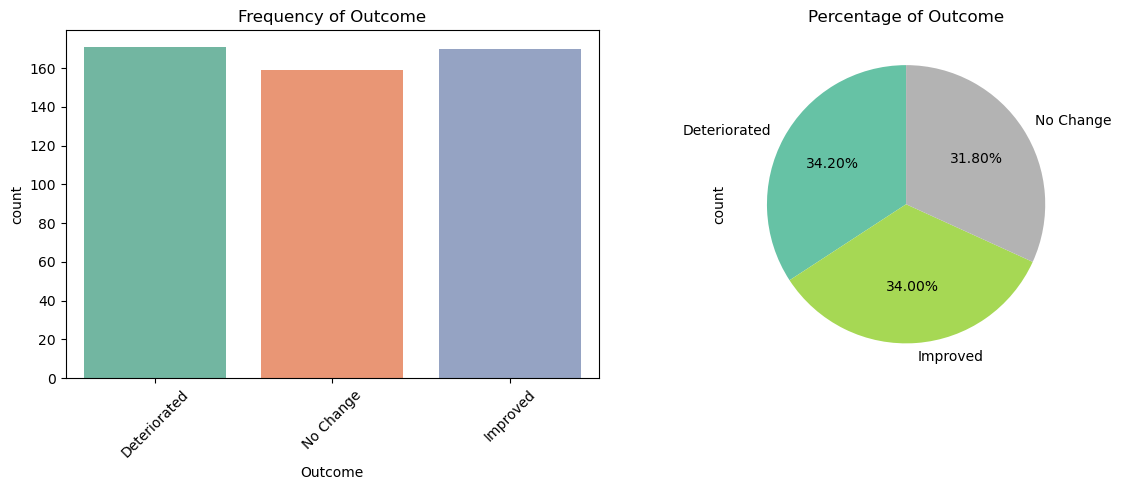

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], data=df, palette="Set2", ax=axes[0])
C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_13948\1551816798.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


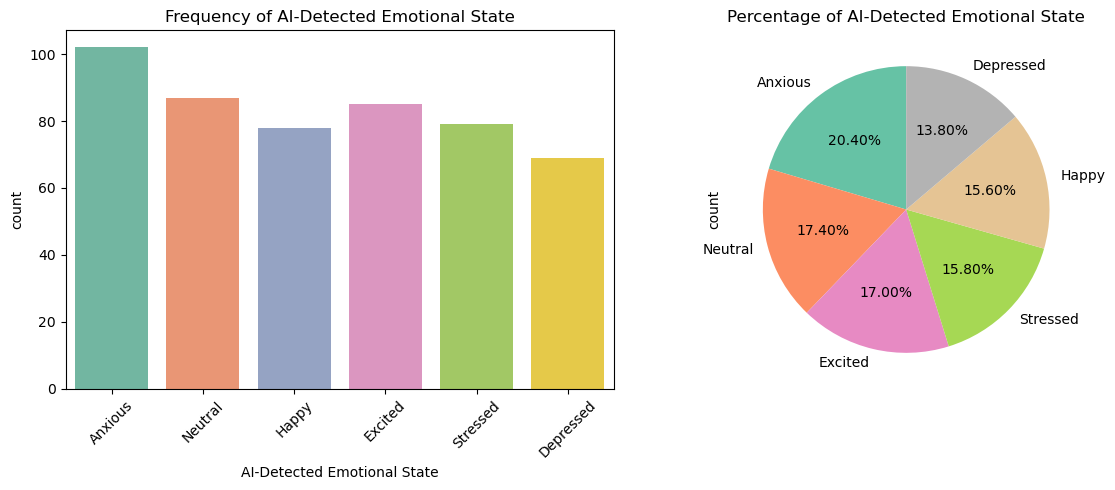

In [11]:
for col in category_col:

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Bar Chart
    sns.countplot(x=df[col], data=df, palette="Set2", ax=axes[0])
    axes[0].set_title(f"Frequency of {col}")
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    

    # Pie Chart
    df[col].value_counts().plot.pie(autopct="%.2f%%", cmap="Set2", startangle=90, ax=axes[1])
    axes[1].set_title(f"Percentage of {col}")
    

    plt.tight_layout()
    plt.show()

In [12]:
numeric_col=df.drop(columns=category_col).drop(columns=["Patient ID","Treatment Start Date"])
numeric_col

,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%)
0,43,10,5,8,5,11,9,7,66
1,40,9,5,4,7,11,7,7,78
2,55,6,3,4,3,14,7,5,62
3,34,6,3,6,5,8,8,10,72
4,52,7,6,6,8,12,5,6,63
...,...,...,...,...,...,...,...,...,...
495,24,10,4,8,6,8,9,10,73
496,22,5,6,6,7,13,6,8,86
497,23,7,3,4,2,10,5,5,87
498,48,9,4,6,9,10,6,7,73


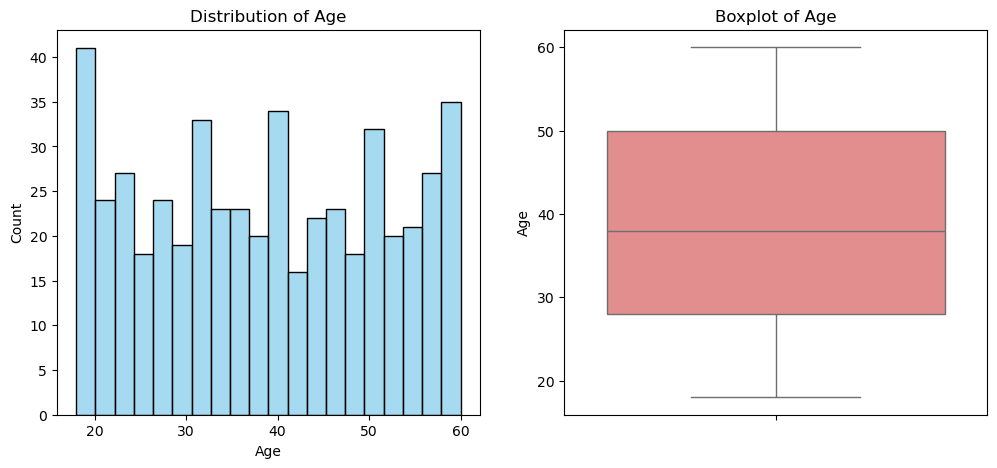

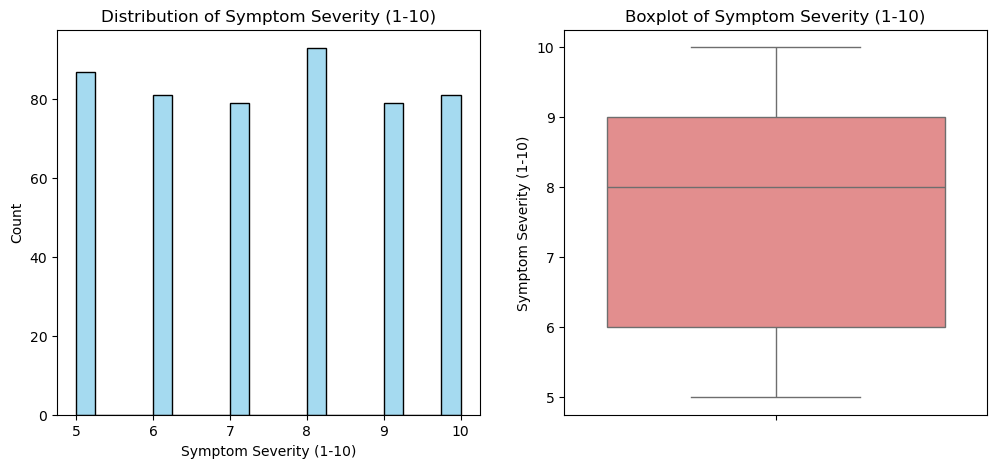

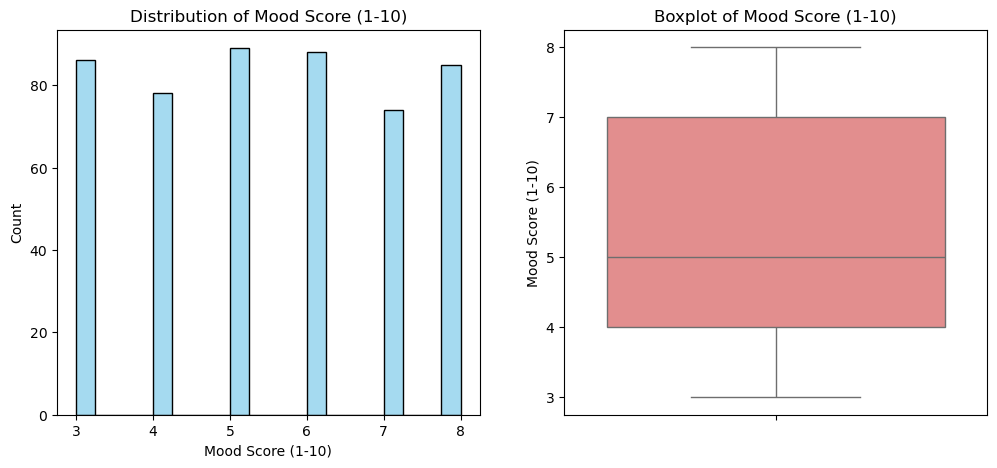

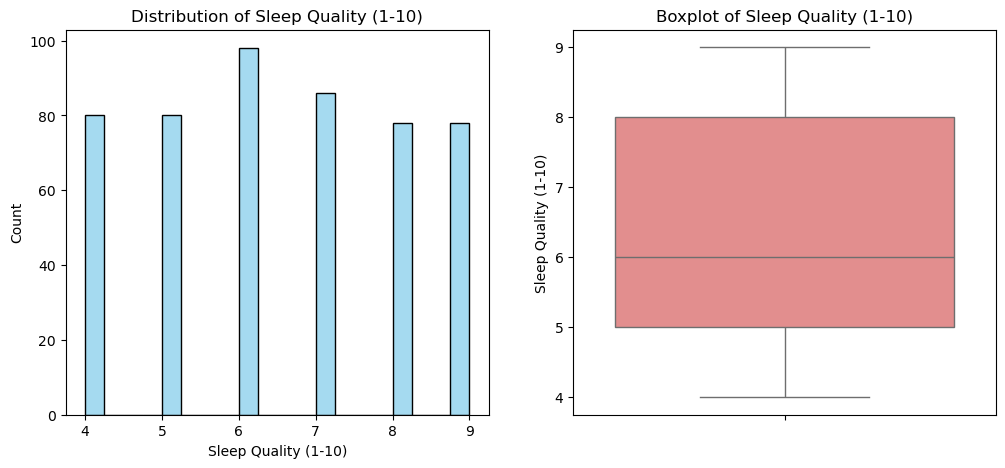

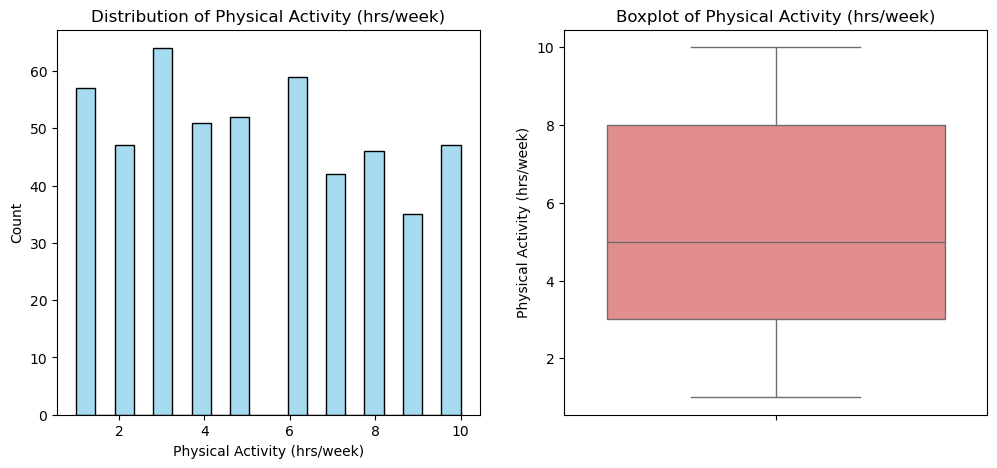

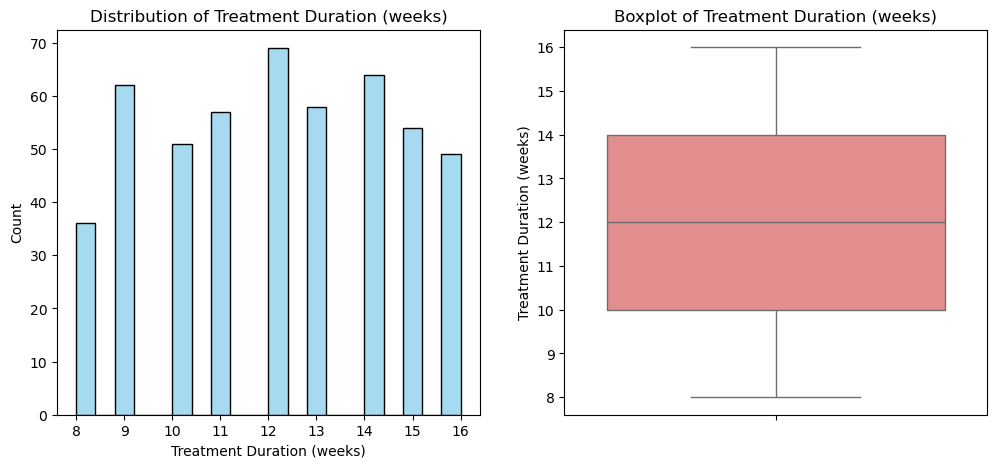

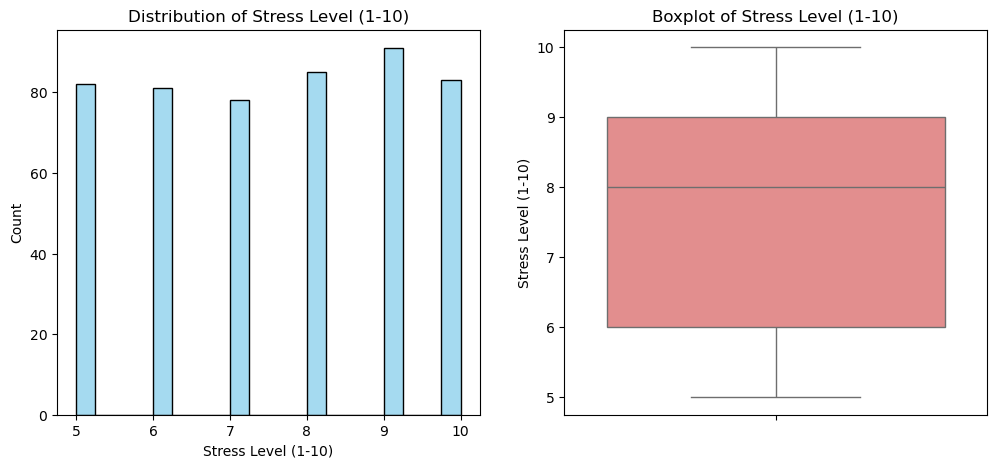

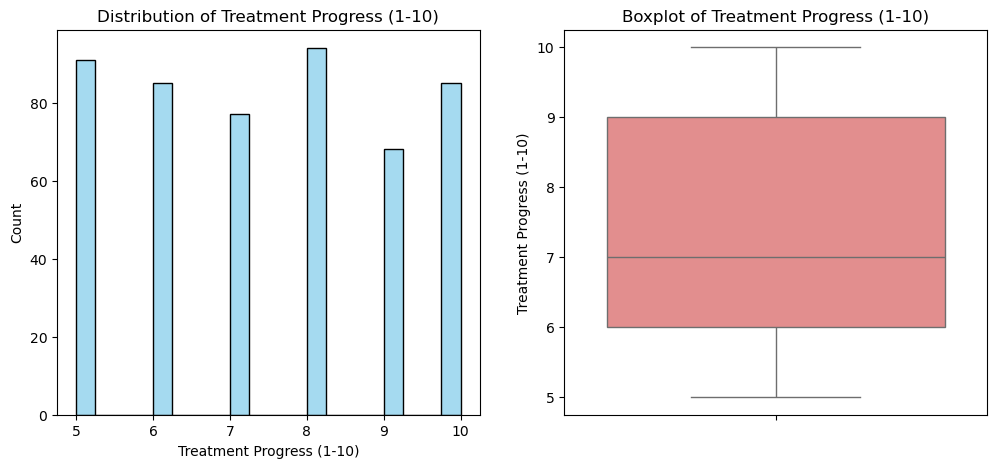

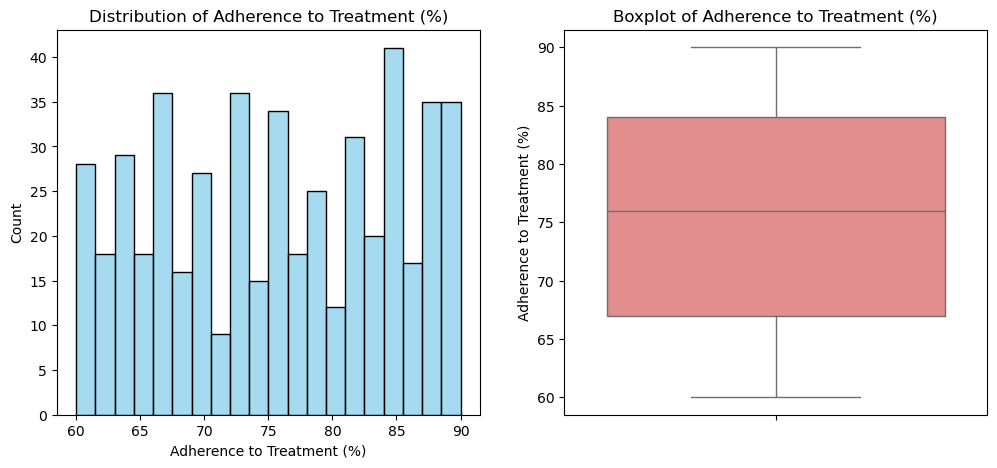

In [13]:
for col in numeric_col:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    sns.histplot(df[col], bins=20, color="skyblue", ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    axes[0].set_xlabel(col)
    
    # Box Plot
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    
    plt.show()

## Symptoms vs. Medications


C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_9900\817172142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Medication'], y=df[col], palette="Set2")


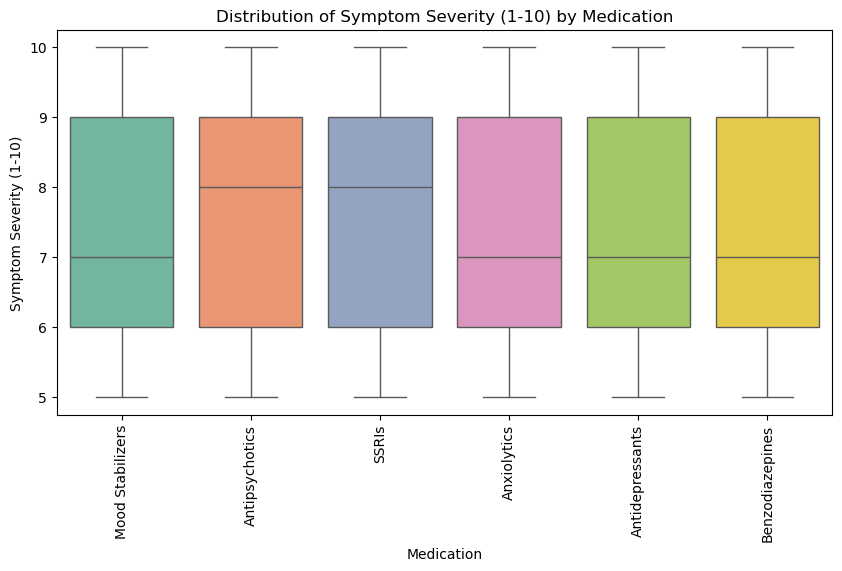

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_9900\817172142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Medication'], y=df[col], palette="Set2")


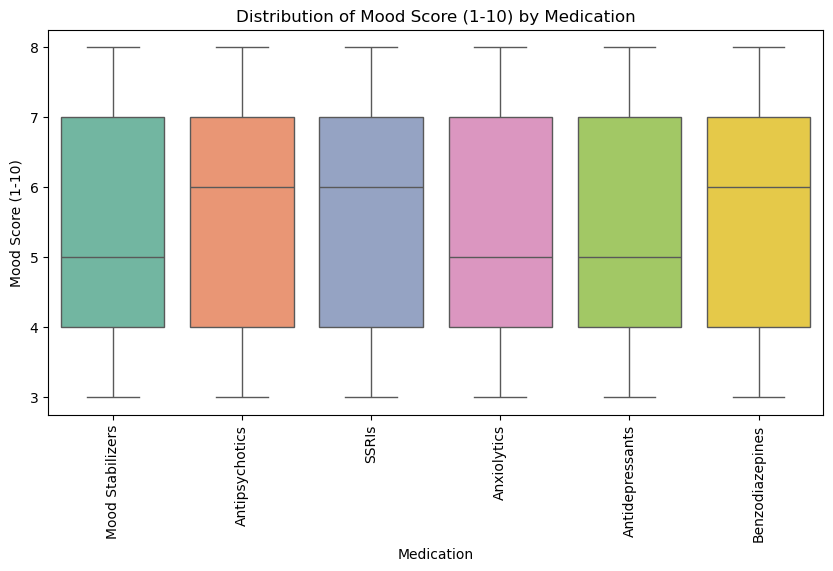

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_9900\817172142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Medication'], y=df[col], palette="Set2")


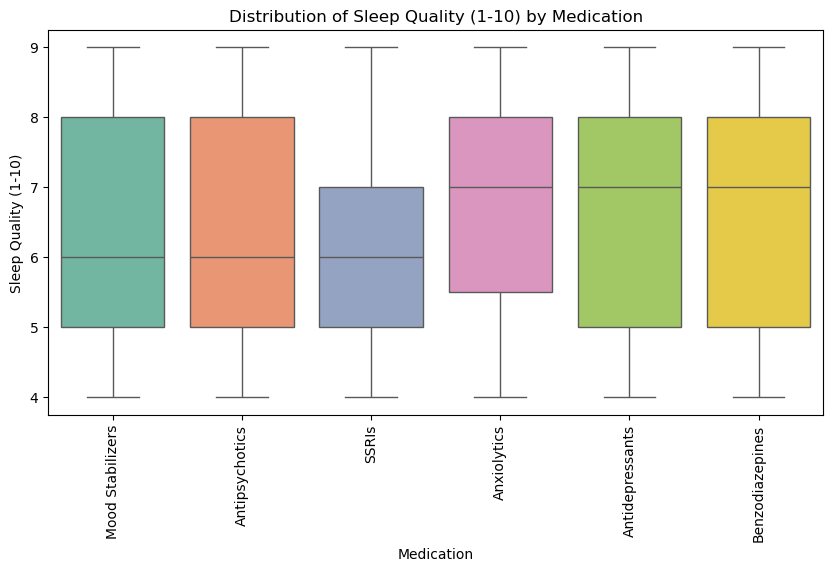

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_9900\817172142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Medication'], y=df[col], palette="Set2")


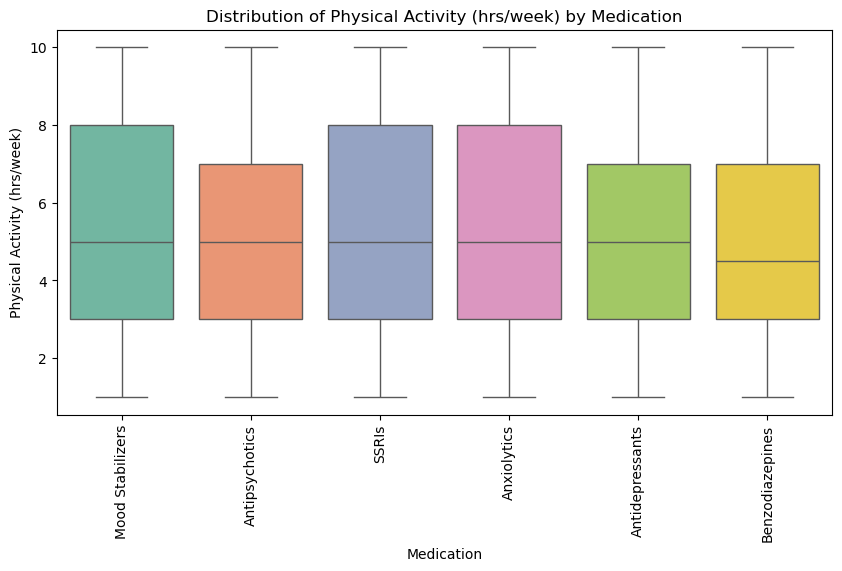

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_9900\817172142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Medication'], y=df[col], palette="Set2")


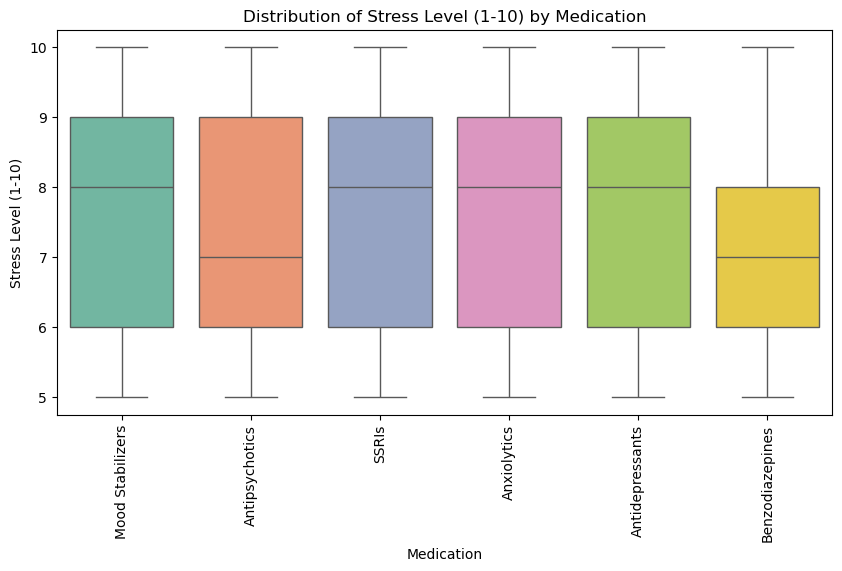

C:\Users\Mirveen Moustafa\AppData\Local\Temp\ipykernel_9900\817172142.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Medication'], y=df[col], palette="Set2")


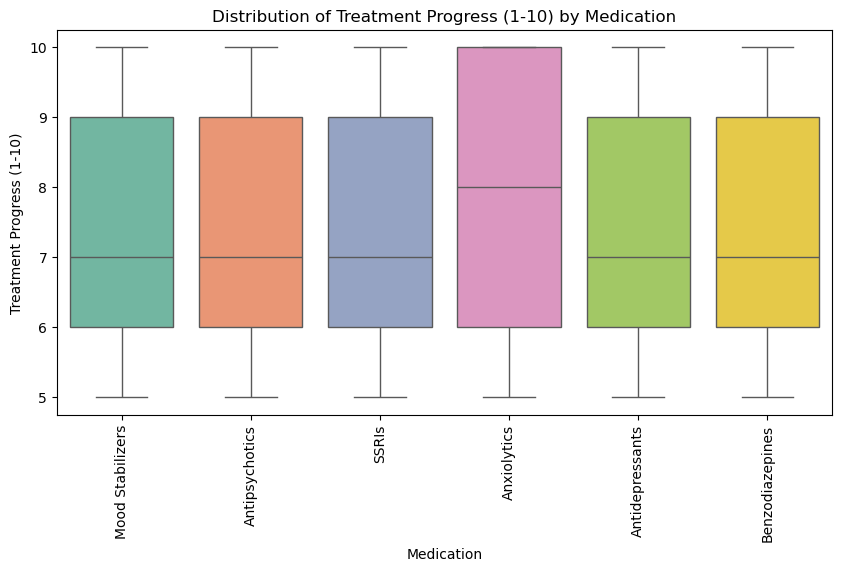

In [7]:
symptom_cols = ['Symptom Severity (1-10)', 'Mood Score (1-10)', 'Sleep Quality (1-10)',
                'Physical Activity (hrs/week)', 'Stress Level (1-10)', 'Treatment Progress (1-10)']

for col in symptom_cols:
    plt.figure(figsize=(10, 5))

    # Box Plot
    sns.boxplot(x=df['Medication'], y=df[col], palette="Set2")
    plt.title(f"Distribution of {col} by Medication")
    plt.xticks(rotation=90)
    plt.xlabel("Medication")
    plt.ylabel(col)

    plt.show()


# Preprocessing

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules



In [10]:
#here we have created a new column symptomps that include all symptoms without the medication
df['Symptoms'] = df.apply(lambda row: 
    (["Severe Symptoms"] if row['Symptom Severity (1-10)'] >= 7 else
     ["Moderate Symptoms"] if row['Symptom Severity (1-10)'] >= 4 else []) +
    (["Depressed"] if row['Mood Score (1-10)'] <= 3 else
     ["Stable"] if row['Mood Score (1-10)'] >= 8 else []) +
    (["Poor Sleep"] if row['Sleep Quality (1-10)'] <= 4 else []) +
    (["High Stress"] if row['Stress Level (1-10)'] >= 7 else
     ["Moderate Stress"] if row['Stress Level (1-10)'] >= 4 else []),
    axis=1)

df['Medications'] = df['Medication']  
print(df)


     Patient ID  Age  Gender                  Diagnosis  \
0             1   43  Female  Major Depressive Disorder   
1             2   40  Female  Major Depressive Disorder   
2             3   55  Female  Major Depressive Disorder   
3             4   34  Female  Major Depressive Disorder   
4             5   52    Male             Panic Disorder   
..          ...  ...     ...                        ...   
495         496   24    Male        Generalized Anxiety   
496         497   22    Male             Panic Disorder   
497         498   23    Male  Major Depressive Disorder   
498         499   48    Male           Bipolar Disorder   
499         500   58    Male           Bipolar Disorder   

     Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0                         10                  5                     8   
1                          9                  5                     4   
2                          6                  3                     4   

In [13]:
df['Items'] = df.apply(lambda row: row['Symptoms'] + [str(row['Medications'])], axis=1)
df[['Patient ID', 'Items']].head()


,Patient ID,Items
0,1,"[Severe Symptoms, High Stress, Mood Stabilizers]"
1,2,"[Severe Symptoms, Poor Sleep, High Stress, Ant..."
2,3,"[Moderate Symptoms, Depressed, Poor Sleep, Hig..."
3,4,"[Moderate Symptoms, Depressed, High Stress, SS..."
4,5,"[Severe Symptoms, Moderate Stress, Anxiolytics]"


In [15]:

transactions = df['Items'].tolist()  
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


In [17]:
print(transactions[:5]) 


[['Severe Symptoms', 'High Stress', 'Mood Stabilizers'], ['Severe Symptoms', 'Poor Sleep', 'High Stress', 'Antipsychotics'], ['Moderate Symptoms', 'Depressed', 'Poor Sleep', 'High Stress', 'SSRIs'], ['Moderate Symptoms', 'Depressed', 'High Stress', 'SSRIs'], ['Severe Symptoms', 'Moderate Stress', 'Anxiolytics']]


In [19]:

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

print(frequent_itemsets)


    support                              itemsets
0     0.152                     (Antidepressants)
1     0.174                      (Antipsychotics)
2     0.142                         (Anxiolytics)
3     0.180                     (Benzodiazepines)
4     0.172                           (Depressed)
5     0.674                         (High Stress)
6     0.326                     (Moderate Stress)
7     0.336                   (Moderate Symptoms)
8     0.174                    (Mood Stabilizers)
9     0.160                          (Poor Sleep)
10    0.178                               (SSRIs)
11    0.664                     (Severe Symptoms)
12    0.170                              (Stable)
13    0.104        (High Stress, Antidepressants)
14    0.116         (High Stress, Antipsychotics)
15    0.114     (Severe Symptoms, Antipsychotics)
16    0.102            (Anxiolytics, High Stress)
17    0.106        (High Stress, Benzodiazepines)
18    0.112    (Severe Symptoms, Benzodiazepines)


In [21]:

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.65)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


           antecedents        consequents  support  confidence      lift
0    (Antidepressants)      (High Stress)    0.104    0.684211  1.015149
1     (Antipsychotics)      (High Stress)    0.116    0.666667  0.989120
2     (Antipsychotics)  (Severe Symptoms)    0.114    0.655172  0.986705
3        (Anxiolytics)      (High Stress)    0.102    0.718310  1.065742
4          (Depressed)      (High Stress)    0.126    0.732558  1.086882
5   (Mood Stabilizers)      (High Stress)    0.120    0.689655  1.023227
6         (Poor Sleep)      (High Stress)    0.110    0.687500  1.020030
7              (SSRIs)      (High Stress)    0.126    0.707865  1.050245
8        (High Stress)  (Severe Symptoms)    0.456    0.676558  1.018912
9    (Severe Symptoms)      (High Stress)    0.456    0.686747  1.018912
10            (Stable)      (High Stress)    0.112    0.658824  0.977483
11             (SSRIs)  (Severe Symptoms)    0.132    0.741573  1.116827
12            (Stable)  (Severe Symptoms)    0.114 

Lift shows how much the rule improves predictions over random chance

We set the minimum confidence threshold to 0.65, ensuring meaningful rules with lift values between 0.97 and 1.11, indicating strong and reliable associations.


### To establish meaningful association rules between symptoms and appropriate treatments, including medications and therapy types, we will follow these steps:

1-we will separated symptoms from treatments to generate association rules specifically between symptoms and medications.

2-then from the frequent itemsets that we calc we will only leave the itemsets that contain at least one symptom and one medication

3-the next step we will make the association rule that antecedents= symptoms and consequents= medicine and therapy type , so it will be (If he has symptom ... , then take medication ... or therapy ....)

In [23]:

symptoms = {"Severe Symptoms", "Moderate Symptoms", "High Stress", "Moderate Stress", "Poor Sleep", "Depressed", "Stable"}
treatments = set(df["Medication"].unique().tolist() + df["Therapy Type"].unique().tolist())

df["Symptoms"] = df["Items"].apply(lambda x: [item for item in x if item in symptoms])

df[["Items", "Symptoms"]].head()


,Items,Symptoms
0,"[Severe Symptoms, High Stress, Mood Stabilizers]","[Severe Symptoms, High Stress]"
1,"[Severe Symptoms, Poor Sleep, High Stress, Ant...","[Severe Symptoms, Poor Sleep, High Stress]"
2,"[Moderate Symptoms, Depressed, Poor Sleep, Hig...","[Moderate Symptoms, Depressed, Poor Sleep, Hig..."
3,"[Moderate Symptoms, Depressed, High Stress, SS...","[Moderate Symptoms, Depressed, High Stress]"
4,"[Severe Symptoms, Moderate Stress, Anxiolytics]","[Severe Symptoms, Moderate Stress]"


In [25]:
all_medications = df['Medications'].explode().unique()
all_symptoms = df['Symptoms'].explode().unique()

symptom_medication_itemsets = frequent_itemsets[
    frequent_itemsets['itemsets'].apply(lambda x: any(s in x for s in all_symptoms) and any(m in x for m in all_medications))
]

print(symptom_medication_itemsets)

    support                             itemsets
13    0.104       (High Stress, Antidepressants)
14    0.116        (High Stress, Antipsychotics)
15    0.114    (Severe Symptoms, Antipsychotics)
16    0.102           (Anxiolytics, High Stress)
17    0.106       (High Stress, Benzodiazepines)
18    0.112   (Severe Symptoms, Benzodiazepines)
22    0.120      (High Stress, Mood Stabilizers)
24    0.126                 (High Stress, SSRIs)
29    0.112  (Mood Stabilizers, Severe Symptoms)
31    0.132             (Severe Symptoms, SSRIs)


In [27]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

filtered_rules = rules[
    rules['antecedents'].apply(lambda x: any(symptom in x for symptom in all_symptoms)) &
    rules['consequents'].apply(lambda x: any(med in x for med in all_medications))
]

print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence','lift']])


          antecedents         consequents  support  confidence      lift
0       (High Stress)   (Antidepressants)    0.104    0.154303  1.015149
2       (High Stress)    (Antipsychotics)    0.116    0.172107  0.989120
4   (Severe Symptoms)    (Antipsychotics)    0.114    0.171687  0.986705
7       (High Stress)       (Anxiolytics)    0.102    0.151335  1.065742
8       (High Stress)   (Benzodiazepines)    0.106    0.157270  0.873722
10  (Severe Symptoms)   (Benzodiazepines)    0.112    0.168675  0.937082
18      (High Stress)  (Mood Stabilizers)    0.120    0.178042  1.023227
22      (High Stress)             (SSRIs)    0.126    0.186944  1.050245
33  (Severe Symptoms)  (Mood Stabilizers)    0.112    0.168675  0.969395
36  (Severe Symptoms)             (SSRIs)    0.132    0.198795  1.116827


# Recommend Medication/Therapy type based on the symptom

In [112]:
def recommend_medication(symptoms, filtered_rules):
    symptom_set = set(symptoms)

    matching_filtered = filtered_rules[
        filtered_rules['antecedents'].apply(lambda x: symptom_set.issuperset(set(x)))
    ]

    if not matching_filtered.empty:
        recommended = matching_filtered.sort_values(by='confidence', ascending=False)['consequents'].tolist()

        unique_medications = list(set(med for meds in recommended for med in meds))
        
        return unique_medications  

    return "no valid medication recommendations found,please consult a doctor."


In [124]:
user_input = input("Enter your symptoms (comma-separated): ")
symptoms_input = [symptom.strip() for symptom in user_input.split(",")]
recommended_medications = recommend_medication(symptoms_input, filtered_rules)
print("Recommended Medication:", recommended_medications)

Enter your symptoms (comma-separated):  High Stress


Recommended Medication: ['Benzodiazepines', 'SSRIs', 'Antipsychotics', 'Anxiolytics', 'Mood Stabilizers', 'Antidepressants']


this function takes a list of symptoms and looks for matching patterns in the filtered association rules,If it finds a match, it suggests medications with the highest confidence to the lowest otherwise, it outputs to the user that there is no recommendation available.